In [14]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2
import skimage.transform as ST

In [7]:
data = h5py.File('ERDA Mount/Transcytosis_analysis/compiled_data.h5', 'r')

In [8]:
X_train, X_val, y_train, y_val = data['X_train'], data['X_val'], data['y_train'], data['y_val']
print(X_train.shape, X_train.dtype)
print(X_val.shape, X_val.dtype)
print(y_train.shape, y_train.dtype)
print(y_val.shape, y_val.dtype)

(506, 1024, 1088, 1) float32
(104, 1024, 1088, 1) float32
(506, 1024, 1088, 1) uint8
(104, 1024, 1088, 1) uint8


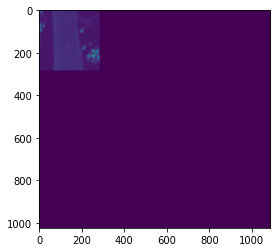

In [10]:
test = X_train[0,...,0]
plt.imshow(test)

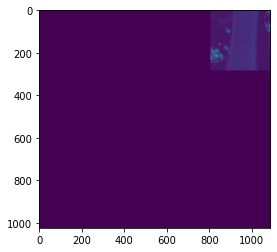

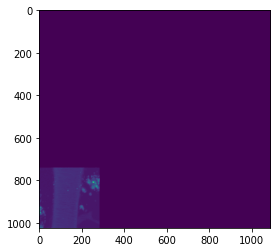

In [13]:
plt.imshow(np.flip(test,1))
plt.show()
plt.imshow(np.flip(test,0))

array([0.        , 0.00456874, 0.00463313, ..., 0.82512784, 0.83065   ,
       0.86384   ], dtype=float32)

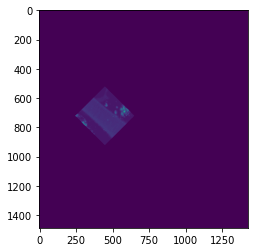

In [112]:
test = np.pad(X_train[0,...,0], ((400,0),(400,0)))
R = cv2.getRotationMatrix2D((test.shape[0]//2, test.shape[1]//2), 45, 1)
plt.imshow(cv2.warpAffine(test,R,(test.shape[0],test.shape[1])))
np.unique(cv2.warpAffine(test,R,(test.shape[0],test.shape[1])))

In [64]:
X_train[0].shape[0]

1024

In [100]:
def rotateData(data_array, low, high, padding):
    data_sets = []
    count = 0
    for data in data_array:
        print(f'\rProcessing dataset no. {count}',end='')
        stack = []
        for i in range(data.shape[0]):
            im = data[i,...,0]
            im = np.pad(im, ((padding,0),(padding,0)))
            rotation = np.random.uniform(-45,45)
            R = cv2.getRotationMatrix2D((im.shape[0]//2, im.shape[1]//2), rotation, 1)
            rotated_im = cv2.warpAffine(im,R,(im.shape[0],im.shape[1]))
            stack.append(rotated_im)
        stack = np.array(stack).reshape((data.shape[0],data.shape[1],data.shape[2],data.shape[3]))
        data_sets.append(stack)
        count += 1
    return data_sets

In [101]:
def flipData(data_array, axis):
    if axis < 0 or axis > 1:
        return 'wrong'
    data_sets = []
    count = 0
    for data in data_array:
        print(f'\rProcessing dataset no. {count}',end='')
        stack = []
        for i in range(data.shape[0]):
            im = data[i,...,0]
            flipped = np.flip(im,axis)
            stack.append(flipped)
        stack = np.array(stack).reshape((data.shape[0],data.shape[1],data.shape[2],data.shape[3]))
        data_sets.append(stack)
        count += 1
    return data_sets

In [89]:
stack = flipData(X_train,0)

In [102]:
data = flipData([y_train,X_val,y_val],0)

Processing dataset no. 0

KeyboardInterrupt: 

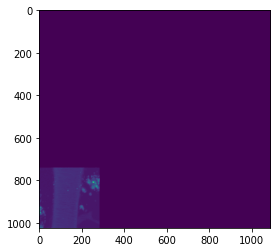

In [93]:
plt.imshow(stack[0,...,0])

In [94]:
h5f = h5py.File('vertical_flip_data.h5', 'w')
h5f.create_dataset('X_train', data=stack)
# h5f.create_dataset('X_val', data=X_val)
# h5f.create_dataset('y_train', data=y_train)
# h5f.create_dataset('y_val', data=y_val)
h5f.close()

In [95]:
data = h5py.File('vertical_flip_data.h5', 'r')

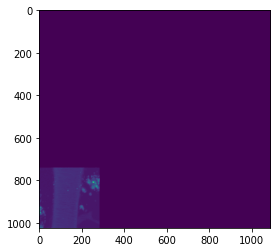

In [97]:
x = data['X_train']
plt.imshow(x[0,...,0])